# Clasificarea speciilor de iris - regresie logistica multi-class - by tool and by my code

In [2]:
from sklearn import linear_model
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

import utils
from LogisticRegression import MyLogisticRegression

### Pasul 1 - plot pt distributia datelor

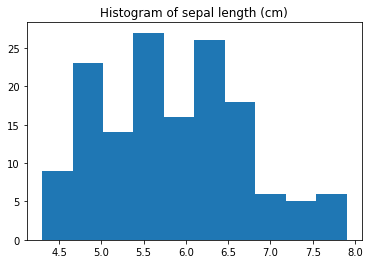

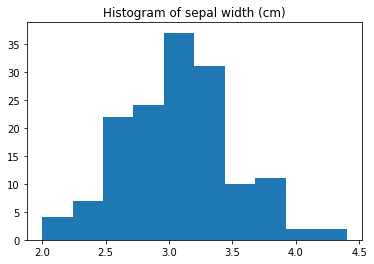

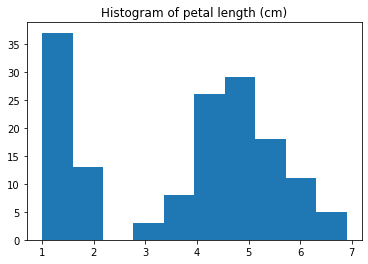

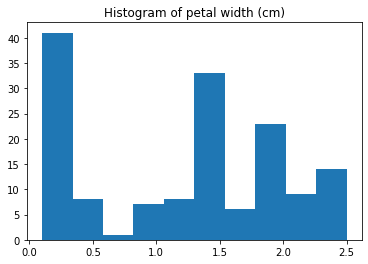

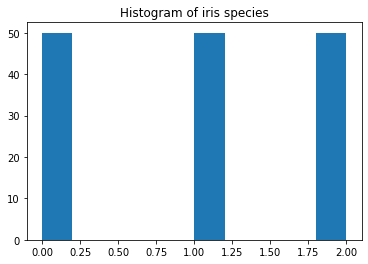

In [5]:
data = load_iris()
inputs = data['data']
outputs = data['target']
outputNames = data['target_names']
featureNames = list(data['feature_names'])
features = [[feat[i] for feat in inputs] for i in range(len(featureNames))]
inputs = [[features[i][j] for i in range(len(featureNames))] for j in range(len(inputs))]

# plot the data distribution
for i in range(len(featureNames)):
    utils.plot_data_histograms(features[i], featureNames[i])
utils.plot_data_histograms(outputs, 'iris species')

### Pasul 2 - impartire date pe train si test si normalizare

In [84]:
# split data into train and test subsets
train_inputs, train_outputs, validation_inputs, validation_outputs = utils.split_data_into_training_and_validation(inputs, outputs, 0.8)

# normalise the features
train_inputs, validation_inputs = utils.normalisation(train_inputs, validation_inputs)

### Pasul 3 - invatare model (cu tool si cod propriu)

In [85]:
# identify (by training) the classifier

# using sklearn
classifier_tool = linear_model.LogisticRegression()

# using developed code
# model initialisation
classifier = MyLogisticRegression()

# train the classifier (fit in on the training data)
classifier_tool.fit(train_inputs, train_outputs)
classifier.fit(train_inputs, train_outputs)

# parameters of the liniar regressor
print('The learnt model - by tool:')
w0, w1, w2, w3, w4 = classifier_tool.intercept_[0], classifier_tool.coef_[0][0], classifier_tool.coef_[0][1], classifier_tool.coef_[0][2], classifier_tool.coef_[0][3]
print('f1(x1, x2, x3, x4) = ', w0, '+', w1, '* x1 +', w2, '* x2 +', w3, '* x3 +', w4, '* x4')
w0, w1, w2, w3, w4 = classifier_tool.intercept_[1], classifier_tool.coef_[1][0], classifier_tool.coef_[1][1], classifier_tool.coef_[1][2], classifier_tool.coef_[1][3]
print('f2(x1, x2, x3, x4) = ', w0, '+', w1, '* x1 +', w2, '* x2 +', w3, '* x3 +', w4, '* x4')
w0, w1, w2, w3, w4 = classifier_tool.intercept_[2], classifier_tool.coef_[2][0], classifier_tool.coef_[2][1], classifier_tool.coef_[2][2], classifier_tool.coef_[2][3]
print('f3(x1, x2, x3, x4) = ', w0, '+', w1, '* x1 +', w2, '* x2 +', w3, '* x3 +', w4, '* x4')
print('The learnt model - my code:')
w0, w1, w2, w3, w4 = classifier.intercept_[0], classifier.coef_[0][0], classifier.coef_[0][1], classifier.coef_[0][2], classifier.coef_[0][3]
print('f1(x1, x2, x3, x4) = ', w0, '+', w1, '* x1 +', w2, '* x2 +', w3, '* x3 +', w4, '* x4')
w0, w1, w2, w3, w4 = classifier.intercept_[1], classifier.coef_[1][0], classifier.coef_[1][1], classifier.coef_[1][2], classifier.coef_[1][3]
print('f2(x1, x2, x3, x4) = ', w0, '+', w1, '* x1 +', w2, '* x2 +', w3, '* x3 +', w4, '* x4')
w0, w1, w2, w3, w4 = classifier.intercept_[2], classifier.coef_[2][0], classifier.coef_[2][1], classifier.coef_[2][2], classifier.coef_[2][3]
print('f3(x1, x2, x3, x4) = ', w0, '+', w1, '* x1 +', w2, '* x2 +', w3, '* x3 +', w4, '* x4')

The learnt model - by tool:
f1(x1, x2, x3, x4) =  -0.2956906006379063 + -0.954786792932353 * x1 + 1.1286619981189137 * x2 + -1.786976806571227 * x3 + -1.6639175482920234 * x4
f2(x1, x2, x3, x4) =  1.8772849630968864 + 0.5563051523958188 * x1 + -0.41580637409586685 * x2 + -0.3030087927470433 * x3 + -0.7904548643035584 * x4
f3(x1, x2, x3, x4) =  -1.5815943624589828 + 0.3984816405365353 * x1 + -0.7128556240230459 * x2 + 2.089985599318271 * x3 + 2.4543724125955833 * x4
The learnt model - my code:
f1(x1, x2, x3, x4) =  -2.123716979252044 + -1.0281781290759848 * x1 + 1.9617477721323981 * x2 + -2.1134814925544734 * x3 + -1.9290854135707873 * x4
f2(x1, x2, x3, x4) =  -0.9839564352044166 + 0.3661910273852912 * x1 + -1.5841170083004599 * x2 + 0.6619662510569394 * x3 + -1.1580578307844993 * x4
f3(x1, x2, x3, x4) =  -3.2823029845741063 + -0.15783232866520785 * x1 + -0.19553505826158593 * x2 + 2.289680970972446 * x3 + 3.4321029627711206 * x4


In [86]:
# predict using the classifier
computed_validation_outputs_tool = classifier_tool.predict(validation_inputs)
computed_validation_outputs = classifier.predict(validation_inputs)

#### Pasul 5 - calcul metricii de performanta si a loss-ului

In [87]:
# calculate the accuracy
accuracy = accuracy_score(validation_outputs, computed_validation_outputs_tool)
print('Accuracy - by tool:', accuracy)
accuracy = accuracy_score(validation_outputs, computed_validation_outputs)
print('Accuracy - my code:', accuracy)

Accuracy - by tool: 0.9666666666666667
Accuracy - my code: 0.9333333333333333


### Cerinta optionala 1 - cross-validation

In [88]:
# create a classifier that uses cross-validation
classifier_cv = linear_model.LogisticRegressionCV(cv=3, max_iter=1000)

# train the classifier
classifier_cv.fit(train_inputs, train_outputs)

print('The learnt model - classifier cross validation:')
w0, w1, w2, w3, w4 = classifier_cv.intercept_[0], classifier_cv.coef_[0][0], classifier_cv.coef_[0][1], classifier_cv.coef_[0][2], classifier_cv.coef_[0][3]
print('f1(x1, x2, x3, x4) = ', w0, '+', w1, '* x1 +', w2, '* x2 +', w3, '* x3 +', w4, '* x4')
w0, w1, w2, w3, w4 = classifier_cv.intercept_[1], classifier_cv.coef_[1][0], classifier_cv.coef_[1][1], classifier_cv.coef_[1][2], classifier_cv.coef_[1][3]
print('f2(x1, x2, x3, x4) = ', w0, '+', w1, '* x1 +', w2, '* x2 +', w3, '* x3 +', w4, '* x4')
w0, w1, w2, w3, w4 = classifier_cv.intercept_[2], classifier_cv.coef_[2][0], classifier_cv.coef_[2][1], classifier_cv.coef_[2][2], classifier_cv.coef_[2][3]
print('f3(x1, x2, x3, x4) = ', w0, '+', w1, '* x1 +', w2, '* x2 +', w3, '* x3 +', w4, '* x4')

The learnt model - classifier cross validation:
f1(x1, x2, x3, x4) =  0.3441140221020885 + -1.732651276451385 * x1 + 2.171351717324173 * x2 + -4.257686643508366 * x3 + -3.983051164797066 * x4
f2(x1, x2, x3, x4) =  4.909780785076727 + 1.4245006214439753 * x1 + -0.2896156409492904 * x2 + -1.7279581346853532 * x3 + -2.056804810607288 * x4
f3(x1, x2, x3, x4) =  -5.253894807178948 + 0.30815065500742717 * x1 + -1.8817360763748554 * x2 + 5.985644778193729 * x3 + 6.039855975404374 * x4


In [89]:
# predict test data
classifier_cv_validation_outputs = classifier_cv.predict(validation_inputs)

# calculate the accuracy
accuracy_cv = accuracy_score(validation_outputs, classifier_cv_validation_outputs)
print('Accuracy1:', accuracy_cv)

Accuracy1: 0.9666666666666667


### Cerinta optionala 2 - investigarea diferitelor functii de loss

In [90]:
# crearea mai multor clasificatori, fiecare utilizand o functie de loss diferita
classifier1 = linear_model.SGDClassifier(loss='log')
classifier2 = linear_model.SGDClassifier(loss='hinge')
classifier3 = linear_model.SGDClassifier(loss='perceptron')

# antrenarea fiecarui clasficator
classifier1.fit(train_inputs, train_outputs)
classifier2.fit(train_inputs, train_outputs)
classifier3.fit(train_inputs, train_outputs)

print('The learnt model - classifier 1:')
w0, w1, w2, w3, w4 = classifier1.intercept_[0], classifier1.coef_[0][0], classifier1.coef_[0][1], classifier1.coef_[0][2], classifier1.coef_[0][3]
print('f1(x1, x2, x3, x4) = ', w0, '+', w1, '* x1 +', w2, '* x2 +', w3, '* x3 +', w4, '* x4')
w0, w1, w2, w3, w4 = classifier1.intercept_[1], classifier1.coef_[1][0], classifier1.coef_[1][1], classifier1.coef_[1][2], classifier1.coef_[1][3]
print('f2(x1, x2, x3, x4) = ', w0, '+', w1, '* x1 +', w2, '* x2 +', w3, '* x3 +', w4, '* x4')
w0, w1, w2, w3, w4 = classifier1.intercept_[2], classifier1.coef_[2][0], classifier1.coef_[2][1], classifier1.coef_[2][2], classifier1.coef_[2][3]
print('f3(x1, x2, x3, x4) = ', w0, '+', w1, '* x1 +', w2, '* x2 +', w3, '* x3 +', w4, '* x4')

print('The learnt model - classifier 2:')
w0, w1, w2, w3, w4 = classifier2.intercept_[0], classifier2.coef_[0][0], classifier2.coef_[0][1], classifier2.coef_[0][2], classifier2.coef_[0][3]
print('f1(x1, x2, x3, x4) = ', w0, '+', w1, '* x1 +', w2, '* x2 +', w3, '* x3 +', w4, '* x4')
w0, w1, w2, w3, w4 = classifier2.intercept_[1], classifier2.coef_[1][0], classifier2.coef_[1][1], classifier2.coef_[1][2], classifier2.coef_[1][3]
print('f2(x1, x2, x3, x4) = ', w0, '+', w1, '* x1 +', w2, '* x2 +', w3, '* x3 +', w4, '* x4')
w0, w1, w2, w3, w4 = classifier2.intercept_[2], classifier2.coef_[2][0], classifier2.coef_[2][1], classifier2.coef_[2][2], classifier2.coef_[2][3]
print('f3(x1, x2, x3, x4) = ', w0, '+', w1, '* x1 +', w2, '* x2 +', w3, '* x3 +', w4, '* x4')


The learnt model - classifier 1:
f1(x1, x2, x3, x4) =  -2.189273569793521 + -0.9345375478169825 * x1 + 6.7386032329032215 * x2 + -6.677295116563499 * x3 + -5.924339869225732 * x4
f2(x1, x2, x3, x4) =  -1.393461500482315 + 3.738113897561305 * x1 + -3.4209115767404032 * x2 + 13.763196526580048 * x3 + -9.999670346034922 * x4
f3(x1, x2, x3, x4) =  -37.20398416669085 + -3.8306775813673752 * x1 + -4.510717631886963 * x2 + 22.710904342446714 * x3 + 24.669566198656625 * x4
The learnt model - classifier 2:
f1(x1, x2, x3, x4) =  -10.038522396439761 + -5.04147729115471 * x1 + 5.6029076238963444 * x2 + -6.954667351367855 * x3 + -9.216333918787049 * x4
f2(x1, x2, x3, x4) =  -9.167294900890006 + -0.8683988873927458 * x1 + -4.587773182800212 * x2 + 10.88703688353743 * x3 + -8.960851349844404 * x4
f3(x1, x2, x3, x4) =  -44.00807716092137 + -1.7554684888969072 * x1 + -6.255211231739907 * x2 + 29.969625334329404 * x3 + 30.139663654418552 * x4


In [91]:
# predict using the classifier
computed_validation_outputs1 = classifier1.predict(validation_inputs)
computed_validation_outputs2 = classifier2.predict(validation_inputs)
computed_validation_outputs3 = classifier3.predict(validation_inputs)

# calculate the accuracy
accuracy1 = accuracy_score(validation_outputs, computed_validation_outputs1)
print('Accuracy1:', accuracy1)
accuracy2 = accuracy_score(validation_outputs, computed_validation_outputs2)
print('Accuracy2:', accuracy2)
accuracy3 = accuracy_score(validation_outputs, computed_validation_outputs3)
print('Accuracy3:', accuracy3)

Accuracy1: 0.8666666666666667
Accuracy2: 0.9666666666666667
Accuracy3: 0.9666666666666667
